In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline





In [3]:
f_birth = pd.read_csv('daily-total-female-births-CA.csv')

In [4]:
f_birth.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [6]:
f_birth = pd.read_csv('daily-total-female-births-CA.csv', index_col = [0], parse_dates = [0] )

In [7]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [15]:
type(f_birth)

pandas.core.frame.DataFrame

In [16]:
series_value = f_birth.values

In [17]:
type(series_value)

numpy.ndarray

In [18]:
f_birth.size

365

In [12]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [19]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<Axes: xlabel='date'>

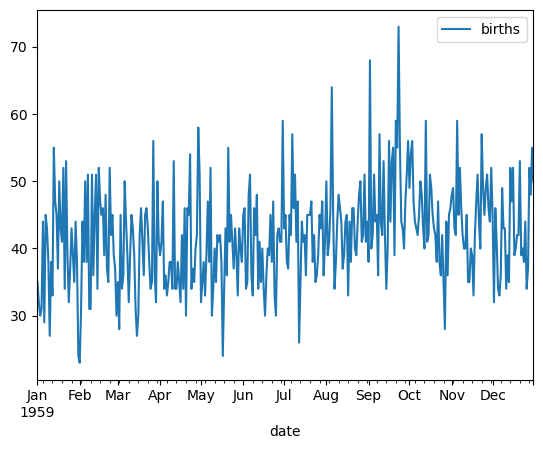

In [21]:
f_birth.plot()

In [24]:
f_birth_mean = f_birth.rolling(window = 30).mean()

<Axes: xlabel='date'>

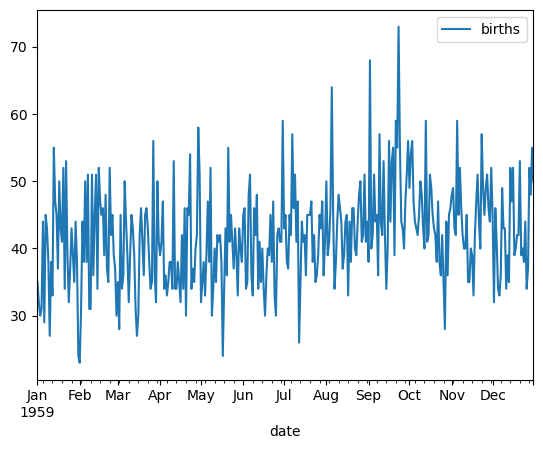

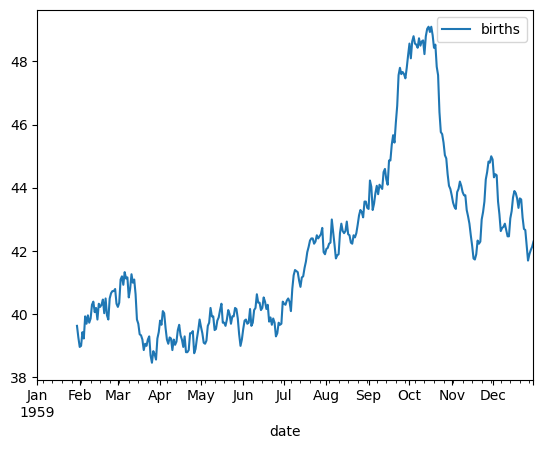

In [25]:
f_birth.plot()
f_birth_mean.plot()

In [26]:
value = pd.DataFrame(series_value)

In [27]:
birth_df = pd.concat([value,value.shift(1)], axis = 1)

In [28]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [29]:
birth_df.columns = ['Actual_birth','Forecast_birth']

In [30]:
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [40]:
birth_test = birth_df[1: ]

In [45]:
birth_test.tail()

,Actual_birth,Forecast_birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [49]:
birth_test = birth_test[0:364]

In [50]:
birth_test.head()

,Actual_birth,Forecast_birth
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0
6,45,29.0


In [36]:
birth_error = mean_squared_error(birth_test.Actual_birth,birth_test.Forecast_birth)

In [43]:
birth_error

84.22252747252747

In [44]:
np.sqrt(birth_error)

9.177283229394606

In [ ]:
ARIMA - Autoregessive(p) Integrated (d) Moving Average(q)

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

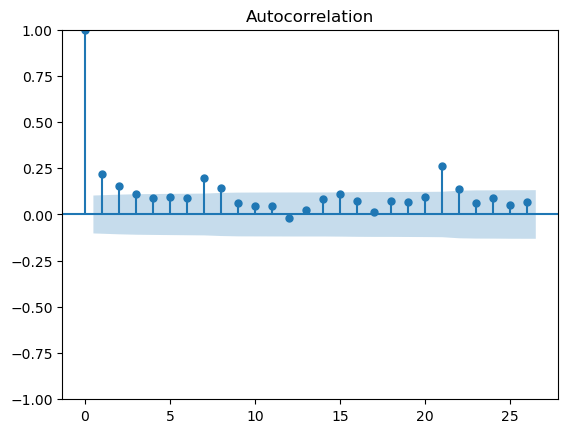

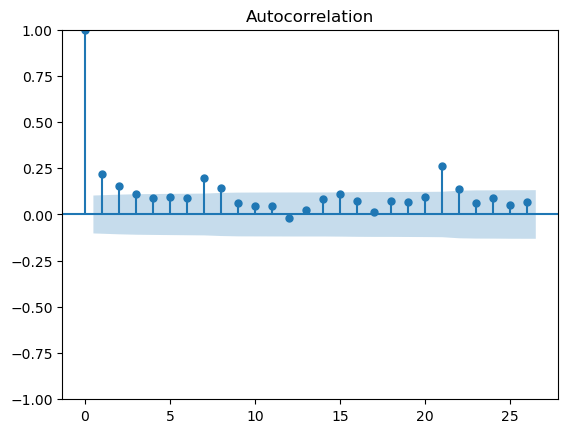

In [53]:
# plot_acf is to identify parameter Q
#ARIMA (p,d,q)

plot_acf(f_birth)

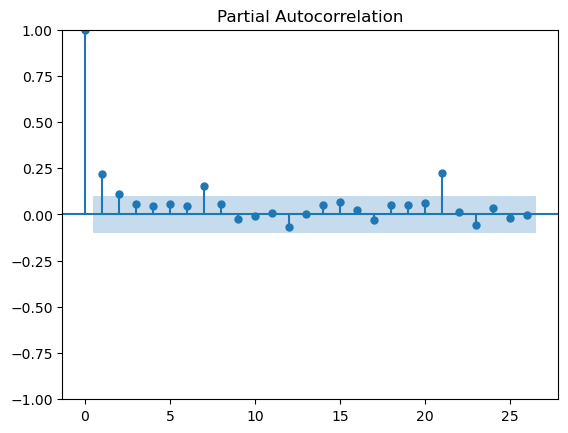

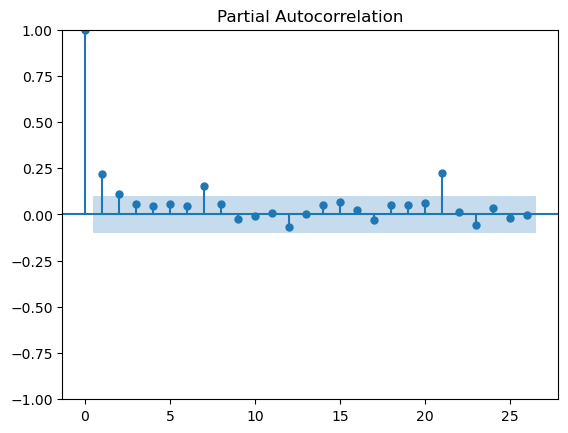

In [54]:
plot_pacf(f_birth) # to identify value of p

In [55]:
# p = 2,3  d = 0 & q = 3,4

f_birth.size

365

In [56]:
birth_train = f_birth[0:330]
birth_test = f_birth[330:]

In [58]:
birth_train.size

330

In [104]:
birth_test.size

35

In [105]:
from statsmodels.tsa.arima.model import ARIMA

In [106]:
birth_model = ARIMA(birth_train, order=(2,1,3))

C:\Users\intel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\intel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\intel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [107]:
model = birth_model.fit()

C:\Users\intel\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [108]:
model.aic

2229.853388902527

In [123]:
pred = model.forecast(steps = 35)

In [124]:
pred[0]

45.0247897389812

In [126]:
birth_test

,births
date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [128]:
np.sqrt(mean_squared_error(birth_test,pred))

6.66473377089382